# Lab 5.01 - Two-sample t-test

In [2]:
# Package imports
import numpy as np                                  # "Scientific computing" 
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Exercise 1 - soft-drink cans

Assume that a soft-drink company is considering a style change to its current can, which has been the company’s trademark for many years. To determine whether this new style is popular with consumers, the company runs a number of focus group sessions around the country. At each of these sessions, randomly selected consumers are allowed to examine the new and traditional styles, exchange ideas, and offer their opinions. 
Eventually, they fill out a form where, among other questions, they are asked to respond to 
the following items, each on a scale of 1 to 7, 7 being the best:
- Rate the attractiveness of the traditional-style can (AO).
- Rate the attractiveness of the new-style can (AN).
- Rate the likelihood that you would buy the product with the traditional-style can (WBO).
- Rate the likelihood that you would buy the product with the new-style can (WBN).

(A and WB stand for "attractiveness" and "would buy", and O and N stand for "old" and "new".)

Use a test to see whether 
consumers rate the attractiveness, and their likelihood to purchase, higher for a new-style can than for the traditional-style can. First make a boxplot.

A few results
- AO vs AN: pvalue=1.32316e-07 < 0.05 => the attractiveness of the new-style can is significantly higher than the attractiveness of the traditional-style can

- WBO vs WBN: pvalue=2.00845995e-06 < 0.05 => the likelihood to buy the new-style can is significantly higher than the likelihood to buy the traditional-style can


- Er zijn twee vergelijkingen:

    1. AO vs AN (attractiviteit: oud vs nieuw)

    2. WBO vs WBN (koopbereidheid: oud vs nieuw)

- Aangezien dezelfde personen beide blikjes beoordelen, is dit een gepaarde t-test (paired t-test).

In [3]:
SoftDrink = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Soft-Drink%20Cans.csv', delimiter=';')
SoftDrink.head()

,Consumer,AO,AN,WBO,WBN
0,1,5,7,4,1
1,2,7,7,6,6
2,3,6,7,7,6
3,4,1,3,1,1
4,5,3,4,1,1


### 2. Visualisatie (boxplots maken om verschillen te zien)

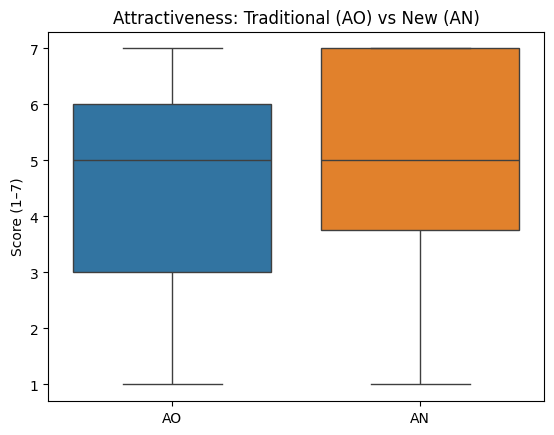

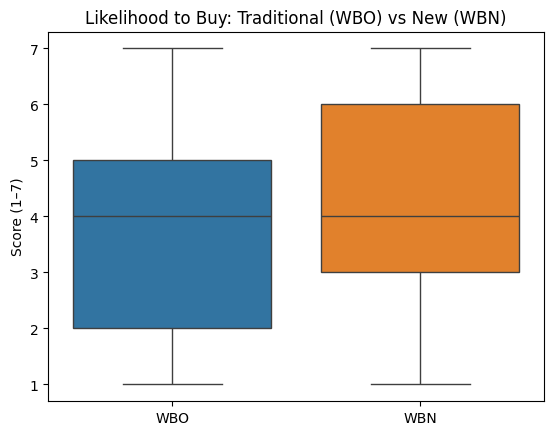

In [4]:
# Aantrekkelijkheid boxplot (AO vs AN)
sns.boxplot(data=SoftDrink[['AO', 'AN']])
plt.title('Attractiveness: Traditional (AO) vs New (AN)')
plt.ylabel('Score (1–7)')
plt.show()

# Koopbereidheid boxplot (WBO vs WBN)
sns.boxplot(data=SoftDrink[['WBO', 'WBN']])
plt.title('Likelihood to Buy: Traditional (WBO) vs New (WBN)')
plt.ylabel('Score (1–7)')
plt.show()


###  3. Paired t-tests uitvoeren + interpretatie

- Waarom gebruiken we ttest_rel() (gepaarde t-test) hier?
    - Omdat dezelfde mensen beide blikjes hebben beoordeeld.

- Elk persoon gaf een score voor oud én nieuw blikje.

- Hun antwoorden zijn dus gepaard: ze horen bij elkaar.

> 👉 Dus je mag niet doen alsof het 2 onafhankelijke groepen zijn!

 ### Ezelsbruggetje examen:

| Situatie                                                              | Test                          |
| --------------------------------------------------------------------- | ----------------------------- |
| **Dezelfde personen** geven **twee beoordelingen** (bijv. voor en na) |  `ttest_rel()` (paired)      |
| **Twee onafhankelijke groepen** (groep A vs groep B)                  |  `ttest_ind()` (independent) |


In [14]:
from scipy.stats import ttest_rel

# Aantrekkelijkheid: AO vs AN
t_stat_A, p_value_A = ttest_rel(SoftDrink['AN'], SoftDrink['AO'])
print(f"AO vs AN → p-value = {p_value_A:.8f}")
if p_value_A < 0.05:
    print("De aantrekkelijkheid van de nieuwe stijl is significant hoger.")
else:
    print("Geen significant verschil in aantrekkelijkheid.")

# Koopbereidheid: WBO vs WBN
t_stat_WB, p_value_WB = ttest_rel(SoftDrink['WBN'], SoftDrink['WBO'])
print(f"WBO vs WBN → p-value = {p_value_WB:.8f}")
if p_value_WB < 0.05:
    print("De koopintentie voor de nieuwe stijl is significant hoger.")
else:
    print("Geen significant verschil in koopintentie.")


AO vs AN → p-value = 0.00000026
De aantrekkelijkheid van de nieuwe stijl is significant hoger.
WBO vs WBN → p-value = 0.00000402
De koopintentie voor de nieuwe stijl is significant hoger.


| Begrip              | Betekenis                                                             |
| ------------------- | --------------------------------------------------------------------- |
| **Nulhypothese H₀** | Er is **geen verschil** → het verschil in gemiddelden = 0             |
| **Alternatieve H₁** | Er **is wél een verschil** → het verschil in gemiddelden ≠ 0 (of > 0) |
| **p < 0.05**        | We **verwerpen H₀** → het verschil is **significant**                 |
| **p ≥ 0.05**        | We houden H₀ → het verschil kan op **toeval** berusten                |

---

### Belangrijk opmerking : 
- Bij de waarde van de t statistiek weten wij als het over de 1ste of 2de element gaat via: 

    - Positieve t-statistiek → eerste kolom (AN) scoort hoger dan tweede kolom (AO)

    - Negatieve t-statistiek → eerste kolom (AN) scoort lager dan tweede kolom (AO)

---

In [12]:
# Interpretatie
if p_value_A < 0.05:
    print("→ De nieuwe stijl wordt als significant aantrekkelijker beoordeeld.")
else:
    print("→ Er is geen significant verschil in aantrekkelijkheid.")

if p_value_WB < 0.05:
    print("→ Consumenten zijn significant meer geneigd het nieuwe blikje te kopen.")
else:
    print("→ Er is geen significant verschil in koopbereidheid.")


→ De nieuwe stijl wordt als significant aantrekkelijker beoordeeld.
→ Consumenten zijn significant meer geneigd het nieuwe blikje te kopen.
